# Polynomial Regression

The goal of this notebook is to empirically find the best polynomial regression by testing different degrees. 

In [143]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [144]:
# Import data
df = pd.read_csv("cleaned_data.csv")

df

,Time,Cases,Close,next_Close
0,0,0,4352.100098,4315.410156
1,1,0,4324.770020,4322.740234
2,2,0,4344.259766,4300.080078
3,5,0,4246.680176,4041.560059
4,6,0,4323.930176,3294.219971
...,...,...,...,...
500,756,592765,5229.529785,5375.669922
501,757,600718,5151.890137,5375.669922
502,758,605046,5115.390137,5375.669922
503,769,657443,5595.779785,5375.669922


In [145]:
"""
Selecting the features(X) and the label(y)
    Label: "Close"
    Features: "Time", "Cases", "old_Close"
"""

y = df["next_Close"].to_numpy()
X = df[["Time","Cases","Close"]].to_numpy().reshape(-1,3)

In [146]:
# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) #The answer

# Define a list of polynomial degrees
degrees = list(range(1,6))

# These variables are for storing the errors for each polynomial degree
tr_errors = []
val_errors = []

# Loop over the degrees
for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    tr_errors.append(tr_error)
    val_errors.append(val_error)

    



In [147]:
print("{:<10s}{:<20s}{:<20s}".format("Degree", "Training error", "Validation error"))
for i in range(len(degrees)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(degrees[i], tr_errors[i], val_errors[i]))

Degree    Training error      Validation error    
1         133833              93704               
2         117338              81644               
3         113148              77506               
4         6038363             1022774301          
5         43239974            24826759334         


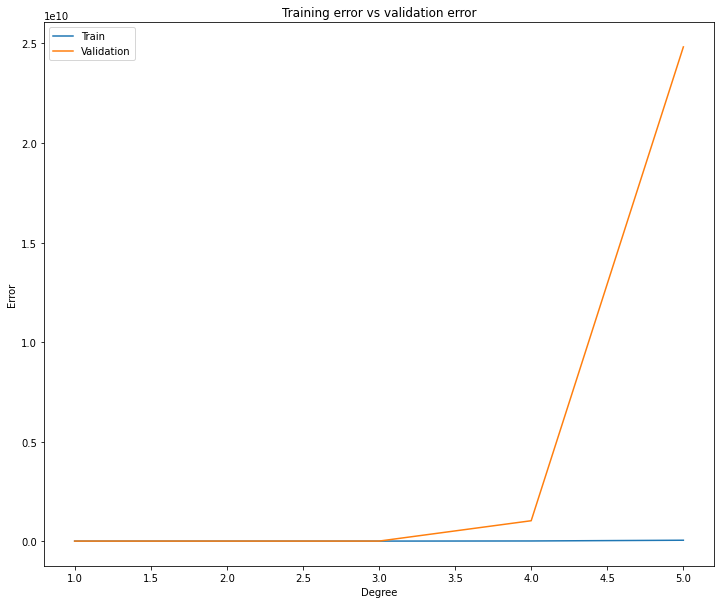

In [148]:
plt.figure(figsize=(12, 10))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

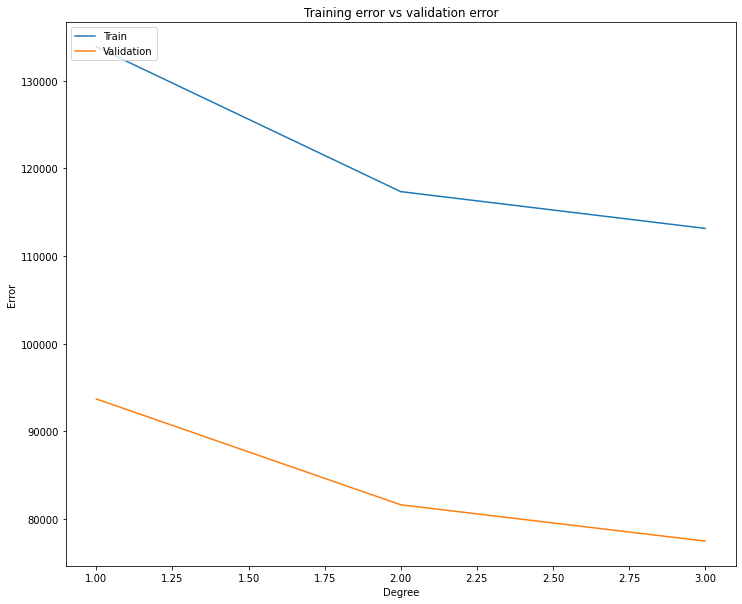

In [149]:
plt.figure(figsize=(12, 10))

plt.plot(degrees[0:3], tr_errors[0:3], label = 'Train')
plt.plot(degrees[0:3], val_errors[0:3],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()